In [60]:
import pandas as pd
import numpy as np
import statsmodels.stats.multitest as ssm
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Problem 1.4

In [ ]:
golub_cl = pd.read_csv("/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3730/6373Pset1/data_and_materials/golub_data/golub_cl.csv")
golub_gnames = pd.read_csv("/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3730/6373Pset1/data_and_materials/golub_data/golub_gnames.csv")
golub = pd.read_csv("/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3730/6373Pset1/data_and_materials/golub_data/golub.csv")

# print(golub_cl.head())
# print('------------')
# print(golub_gnames.head())
# print('------------')
# print(golub.head())

golub_cl_np = golub_cl.to_numpy()
golub_gnames_np = golub_gnames.to_numpy()
golub_np = golub.to_numpy()[:, 1:]


In [36]:
#Getting Means for ALL vs AML for each gene

AML_mask = (golub_cl_np[:, 1]).astype(bool) # True for patients with AML, False otherwise

AML_array = golub_np[:, AML_mask]
mu_M = np.mean(AML_array, axis=1)

ALL_array = golub_np[:, ~AML_mask]
mu_L = np.mean(ALL_array, axis=1)


In [58]:
# Calculate p-values 
t_stats, p_values = stats.ttest_ind(ALL_array, AML_array, axis = 1, equal_var=False)

parti = np.where(p_values < 0.05) # uncorrected p-values

partii, _, _, _ = ssm.multipletests(p_values, method='holm') # holm-bonferroni
partii = np.where(partii)


partiii, _, _, _ = ssm.multipletests(p_values, method='fdr_bh') # benjamini-hochberg
partiii = np.where(partiii)


print("# of genes associated with diff tumor types with uncorrected p-values: ", len(parti[0]))
print("# of genes associated with diff tumor types using Holm-Bonferroni Correction: ", len(partii[0]))
print("# of genes associated with diff tumor types using Benjamini-Hochberg Correction: ", len(partiii[0]))


# of genes associated with diff tumor types with uncorrected p-values:  1078
# of genes associated with diff tumor types using Holm-Bonferroni Correction:  103
# of genes associated with diff tumor types using Benjamini-Hochberg Correction:  695


# Problem 1.5a

### part (i)

In [12]:
X = pd.read_csv("/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3730/6373Pset1/data_and_materials/syn_X.csv").to_numpy()
y = pd.read_csv("/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3730/6373Pset1/data_and_materials/syn_y.csv").to_numpy()

# # manual
# ones = np.ones((X.shape[0], 1))
# Xtilde = np.hstack((ones, X))
# print(np.linalg.inv(Xtilde.T@Xtilde)@Xtilde.T@y)

# sklearn
model = LinearRegression()
model.fit(X, y)

print(model.coef_)
print(model.intercept_)

[[ 1.26343191 -4.59990074]]
[1.92739312]


### part (ii)

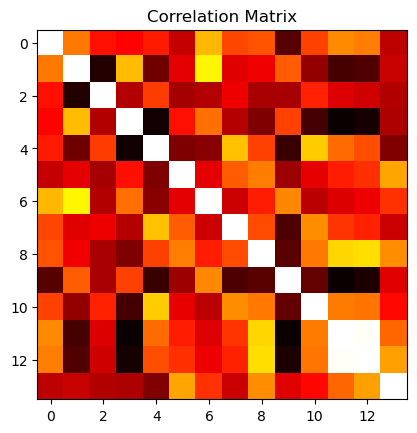

(array([11, 12]), array([12, 11]))


In [58]:
data = pd.read_csv("/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3730/6373Pset1/data_and_materials/mortality.csv")

y = data['Mortality'].to_numpy()
X = data.drop(columns=['Mortality', 'City']).to_numpy()

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

corr_matrix = np.corrcoef(X_normalized, rowvar=False)
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.title('Correlation Matrix')
plt.show()

condition = ((corr_matrix > 0.8) & (corr_matrix < 0.999))
print(np.where(condition))

final_X = np.delete(X_normalized, 11, axis=1)

### part(iii)

[-13.42640022  -9.08438153   1.93774175  14.11403884  -7.79133437
   7.0376805   42.26779945  -8.51159271   3.65597242  -2.66881573
  -1.84908138  -4.45272546  14.15395374] 941.1730508474576
0.7475203551554932


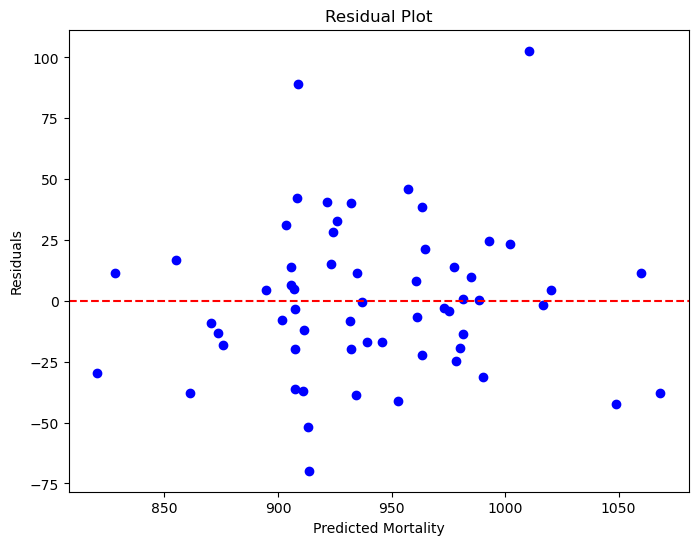

In [61]:
model = Ridge(alpha=2)

model.fit(final_X, y)

print(model.coef_, model.intercept_)

y_pred = model.predict(final_X)
residuals = y-y_pred

print(r2_score(y, y_pred))

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')  # Plot residuals vs. predicted values
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.title('Residual Plot')
plt.xlabel('Predicted Mortality')
plt.ylabel('Residuals')
plt.show()